In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# ABOUT DATA

In [118]:
data = pd.read_csv("bank-additional.csv", delimiter=';')

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# 1. Data Cleaning

In [121]:
column_order = ["age", "job", "marital", "education", "default", "housing", "loan",
                "contact", "month", "day_of_week", "duration", "campaign", "pdays",
                "previous", "poutcome", "emp.var.rate", "cons.price.idx",
                "cons.conf.idx", "euribor3m", "nr.employed", "y"]

# Read the CSV file with the specified column order
bank_additional = pd.read_csv("bank-additional.csv", delimiter=';', names=column_order)

In [123]:
print(bank_additional.shape)


(4120, 21)


In [125]:
print(bank_additional.head())

   age          job  marital    education  default  housing     loan  \
0  age          job  marital    education  default  housing     loan   
1   30  blue-collar  married     basic.9y       no      yes       no   
2   39     services   single  high.school       no       no       no   
3   25     services  married  high.school       no      yes       no   
4   38     services  married     basic.9y       no  unknown  unknown   

     contact  month  day_of_week  ...  campaign  pdays  previous     poutcome  \
0    contact  month  day_of_week  ...  campaign  pdays  previous     poutcome   
1   cellular    may          fri  ...         2    999         0  nonexistent   
2  telephone    may          fri  ...         4    999         0  nonexistent   
3  telephone    jun          wed  ...         1    999         0  nonexistent   
4  telephone    jun          fri  ...         3    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0  

In [127]:
print(data.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [129]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data[categorical_columns] = data[categorical_columns].astype('category')

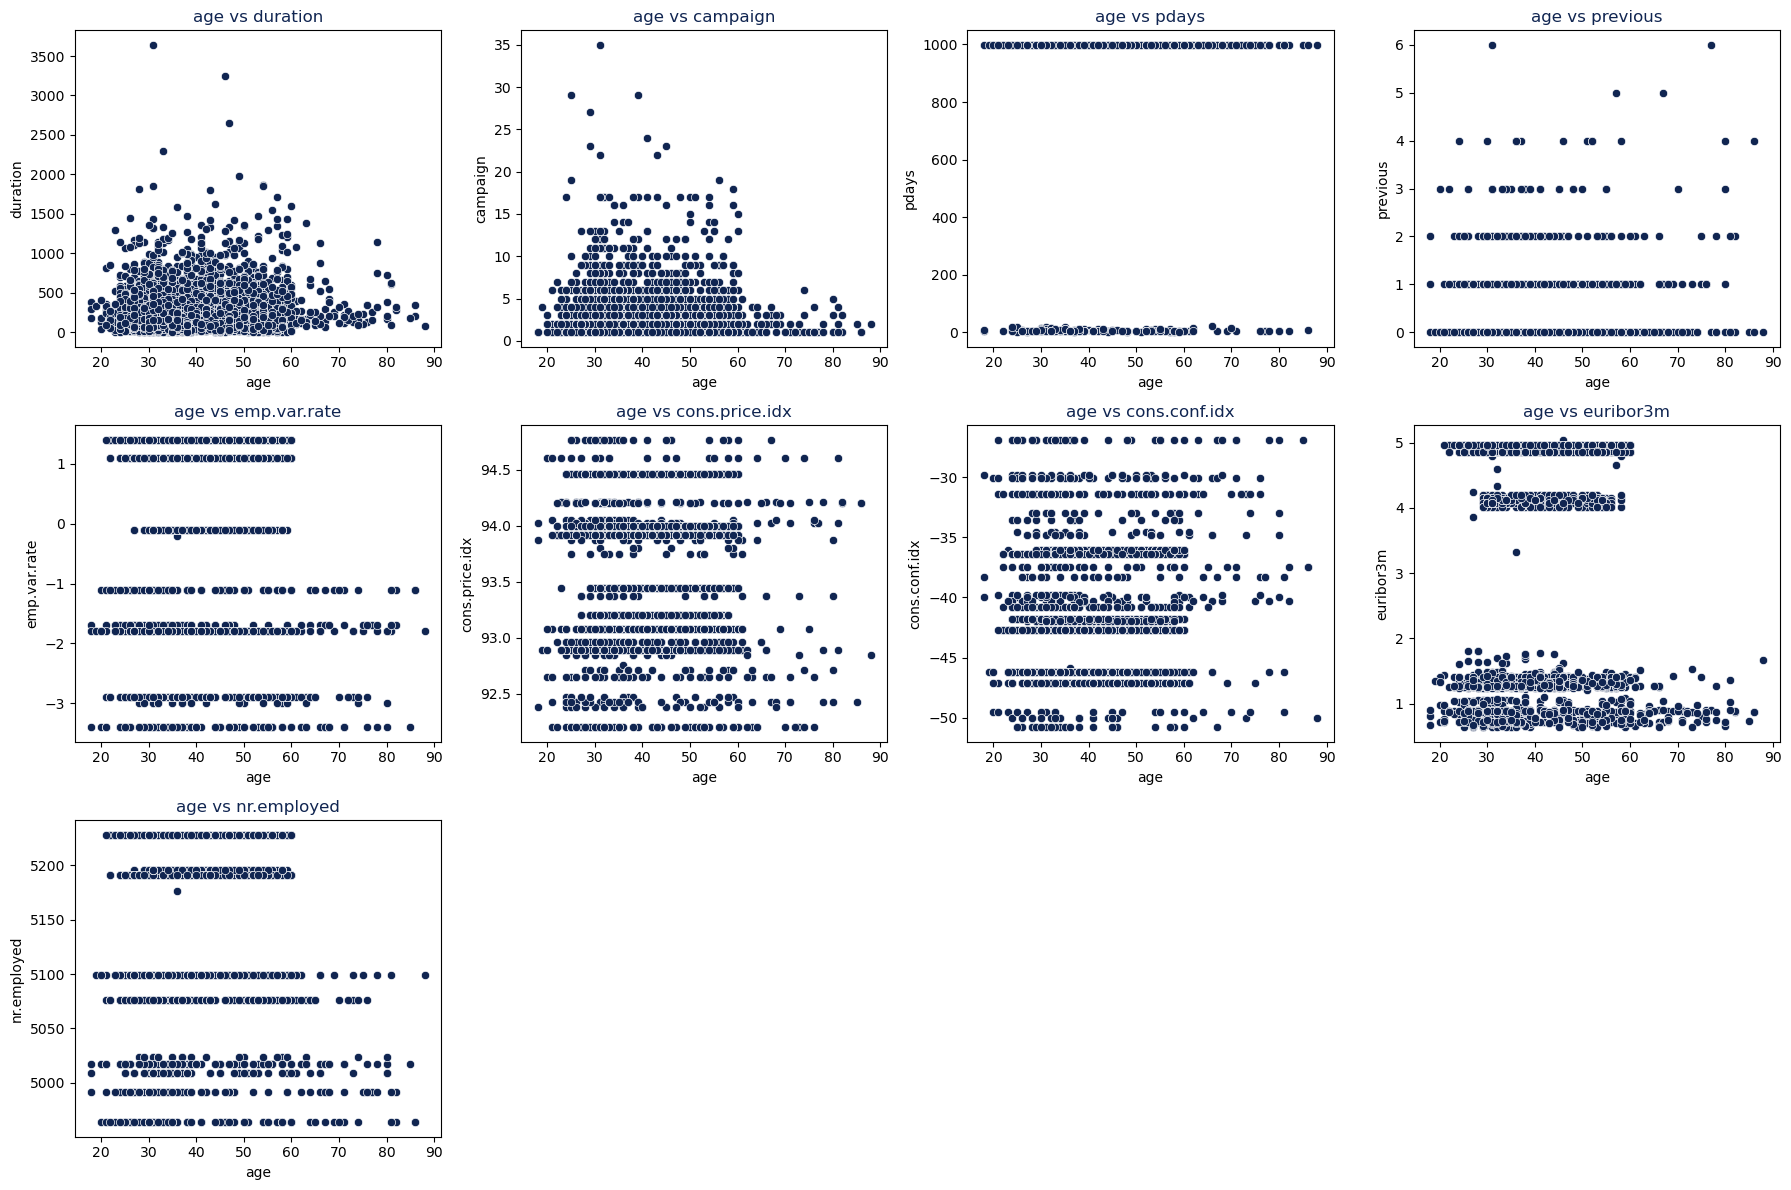

In [131]:
reference_column = 'age'
numerical_columns = ['duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.scatterplot(data=data, x=reference_column, y=column, ax=axes[i], color = (16/255, 37/255, 81/255))
    axes[i].set_title(f'{reference_column} vs {column}', fontsize=12, color = (16/255, 37/255, 81/255))
    axes[i].set_xlabel(reference_column, fontsize=10)
    axes[i].set_ylabel(column, fontsize=10)

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

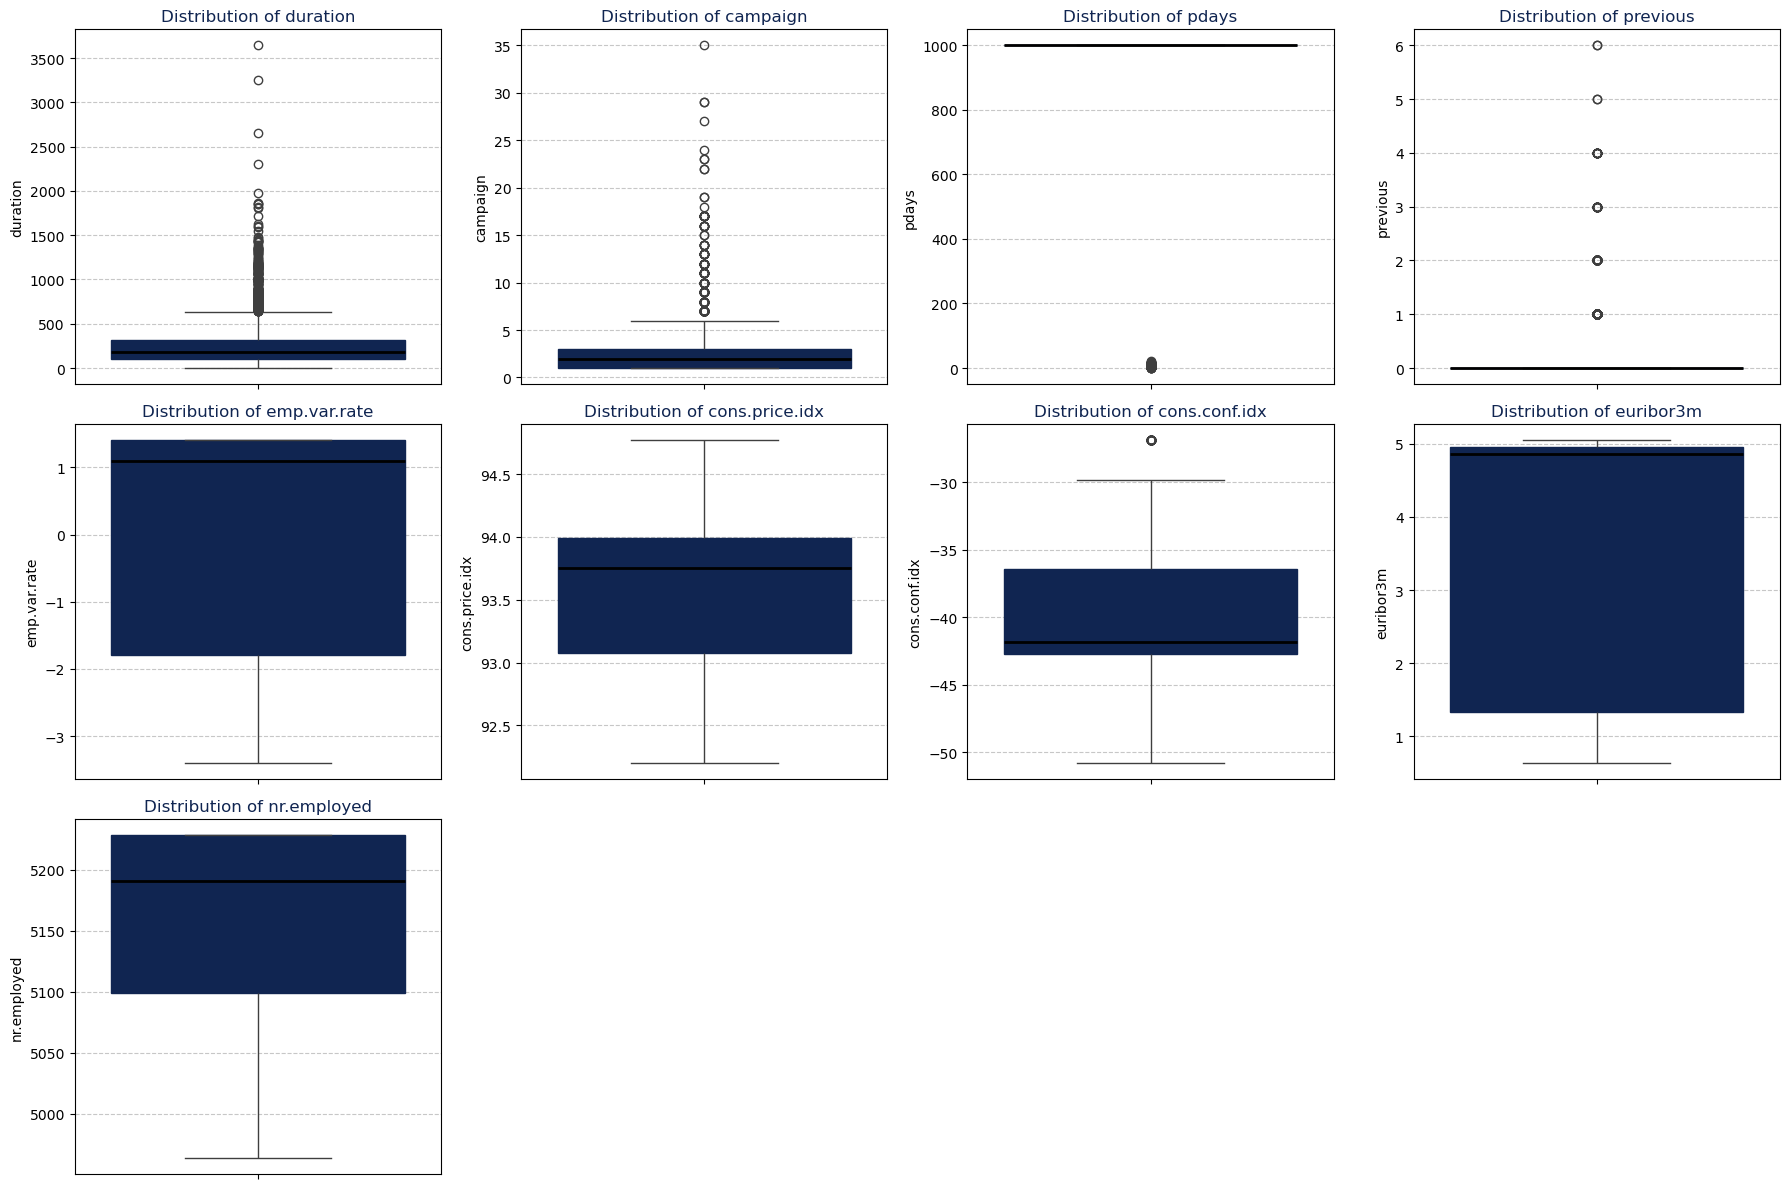

In [133]:
numerical_columns = ['duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(
        data=data,
        y=column,
        ax=axes[i],
        boxprops=dict(facecolor = (16/255, 37/255, 81/255), edgecolor = (16/255, 37/255, 81/255)),
        medianprops=dict(color="black", linewidth=2)
    )
    axes[i].set_title(f'Distribution of {column}', fontsize=12,color = (16/255, 37/255, 81/255) )
    axes[i].set_ylabel(column, fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [135]:
# Cap the values in the 'campaign' and 'duration' columns at the 95th percentile
for column in ['campaign', 'duration']:
    threshold = data[column].quantile(0.90)
    data[column] = np.where(data[column] > threshold, threshold, data[column])

# Remove any rows where the 'age' column has values greater than 90
data = data[data['age'] <= 90]

# Print the first few rows to check the transformed data
data.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# 2. Data Preprocessing

In [138]:
scaler = MinMaxScaler()

# List of numerical columns to scale (update as needed)
numerical_cols = ['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Apply Min-Max Scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Print the first few rows to check the transformed data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.171429,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0.25,999,0,nonexistent,0.333333,0.269680,0.192469,0.153741,0.512287,no
1,0.300000,services,single,high.school,no,no,no,telephone,may,fri,...,0.75,999,0,nonexistent,0.937500,0.698753,0.602510,0.956916,0.859735,no
2,0.100000,services,married,high.school,no,yes,no,telephone,jun,wed,...,0.00,999,0,nonexistent,1.000000,0.882307,0.376569,0.981179,1.000000,no
3,0.285714,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0.50,999,0,nonexistent,1.000000,0.882307,0.376569,0.980499,1.000000,no
4,0.414286,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0.00,999,0,nonexistent,0.687500,0.389322,0.368201,0.806349,0.877883,no


In [140]:
# Convert the 'pdays' column into a binary feature: 0 indicates not contacted (999), and 1 indicates contacted
data['contacted_before'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Remove the original 'pdays' column from the DataFrame
data.drop('pdays', axis=1, inplace=True)

# Display the first few rows of the new 'contacted_before' column to confirm the changes
print(data[['contacted_before']].head())

   contacted_before
0                 0
1                 0
2                 0
3                 0
4                 0


In [142]:
# Define the list of categorical columns for one-hot encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Identify the columns that are present in the DataFrame
existing_columns = [col for col in categorical_columns if col in data.columns]

# Display missing columns for troubleshooting
missing_columns = [col for col in categorical_columns if col not in data.columns]
if missing_columns:
    print(f"The following columns are not found in the DataFrame and will be skipped: {missing_columns}")

# Perform one-hot encoding on the available columns
if existing_columns:
    data = pd.get_dummies(data, columns=existing_columns)
    print("One-hot encoding has been successfully completed.")
else:
    print("No valid categorical columns found for one-hot encoding.")

# Display the updated DataFrame structure
print(data.head())


One-hot encoding has been successfully completed.
        age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0  0.171429  0.893250      0.25         0      0.333333        0.269680   
1  0.300000  0.634629      0.75         0      0.937500        0.698753   
2  0.100000  0.416361      0.00         0      1.000000        0.882307   
3  0.285714  0.031181      0.50         0      1.000000        0.882307   
4  0.414286  0.106383      0.00         0      0.687500        0.389322   

   cons.conf.idx  euribor3m  nr.employed   y  ...  month_oct  month_sep  \
0       0.192469   0.153741     0.512287  no  ...      False      False   
1       0.602510   0.956916     0.859735  no  ...      False      False   
2       0.376569   0.981179     1.000000  no  ...      False      False   
3       0.376569   0.980499     1.000000  no  ...      False      False   
4       0.368201   0.806349     0.877883  no  ...      False      False   

   day_of_week_fri  day_of_week_mon  day_of_week

# 3. Feature Selection

In [145]:
# Check if 'y' exists in the DataFrame and its data type
print("Column 'y' exists:", 'y' in data.columns)
print("Data type of 'y':", data['y'].dtype if 'y' in data.columns else "Column 'y' does not exist.")

# If 'y' exists and needs to be encoded:
if 'y' in data.columns and data['y'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['y'] = le.fit_transform(data['y'])
    print("Column 'y' encoded successfully.")

Column 'y' exists: True
Data type of 'y': object
Column 'y' encoded successfully.


In [147]:
# Ensure all categorical variables are one-hot encoded
data = pd.get_dummies(data)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Define a threshold for selecting the features based on correlation
threshold = 0.1  # Adjust as needed

# Find and store features that have a correlation above the threshold with 'y'
important_features = corr_matrix.index[abs(corr_matrix['y']) > threshold].tolist()

# Remove 'y' from the list if it's included
if 'y' in important_features:
    important_features.remove('y')

# Print the important features
print("Important features based on correlation:", important_features)


Important features based on correlation: ['duration', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed', 'contacted_before', 'contact_cellular', 'contact_telephone', 'month_dec', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success']


# 4. Model Selection

In [150]:
# Assuming data[important_features] and data['y'] are already defined
X = data[important_features]
y = data['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define pipelines for each model with SMOTE integration
pipelines = {
    'logistic_regression': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier())
    ]),
    'neural_network': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', MinMaxScaler()),
        ('classifier', MLPClassifier(max_iter=1000))
    ])
}

# Fit and evaluate each model
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    results[name] = classification_report(y_test, predictions)

# Print results
for name, result in results.items():
    print(f"{name} Classification Report:\n{result}\n")

logistic_regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       921
           1       0.37      0.94      0.53       109

    accuracy                           0.83      1030
   macro avg       0.68      0.87      0.71      1030
weighted avg       0.93      0.83      0.86      1030


random_forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       921
           1       0.43      0.61      0.50       109

    accuracy                           0.87      1030
   macro avg       0.69      0.76      0.72      1030
weighted avg       0.90      0.87      0.88      1030


neural_network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       921
           1       0.38      0.91      0.54       109

    accuracy                           0.83      1030
   macro

# 5. Hyperparameter Tuning

In [152]:
# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l2']  # Norm used in penalization
}

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'classifier__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}


In [153]:
# Logistic Regression Grid Search
grid_search_lr = GridSearchCV(
    estimator=pipelines['logistic_regression'],  # your logistic regression pipeline
    param_grid=param_grid_lr,
    scoring='accuracy',  # or other relevant scoring method
    cv=5,  # number of cross-validation folds
    verbose=1,  # for logging output
    n_jobs=-1  # number of CPU cores to use
)

# Random Forest Grid Search
grid_search_rf = GridSearchCV(
    estimator=pipelines['random_forest'],  # your random forest pipeline
    param_grid=param_grid_rf,
    scoring='accuracy',  # or other relevant scoring method
    cv=5,  # number of cross-validation folds
    verbose=1,  # for logging output
    n_jobs=-1  # number of CPU cores to use
)


In [154]:
# Fit Grid Search for Logistic Regression
grid_search_lr.fit(X_train, y_train)

# Fit Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [158]:
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)


Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Best score for Logistic Regression: 0.8481744320834185
Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Best score for Random Forest: 0.8782799116719906


# 6. MODEL EVALUATION

In [160]:
# Evaluate the models with the best parameters
best_lr_model = grid_search_lr.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

lr_predictions = best_lr_model.predict(X_test)
cm = confusion_matrix(y_test, lr_predictions)
rf_predictions = best_rf_model.predict(X_test)
cm_2 = confusion_matrix(y_test, rf_predictions)


# Accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       921
           1       0.37      0.94      0.53       109

    accuracy                           0.83      1030
   macro avg       0.68      0.87      0.71      1030
weighted avg       0.93      0.83      0.86      1030

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       921
           1       0.42      0.68      0.52       109

    accuracy                           0.87      1030
   macro avg       0.69      0.78      0.72      1030
weighted avg       0.90      0.87      0.88      1030

Logistic Regression Confusion Matrix:
[[749 172]
 [  7 102]]
Random Forest Confusion Matrix:
[[820 101]
 [ 35  74]]


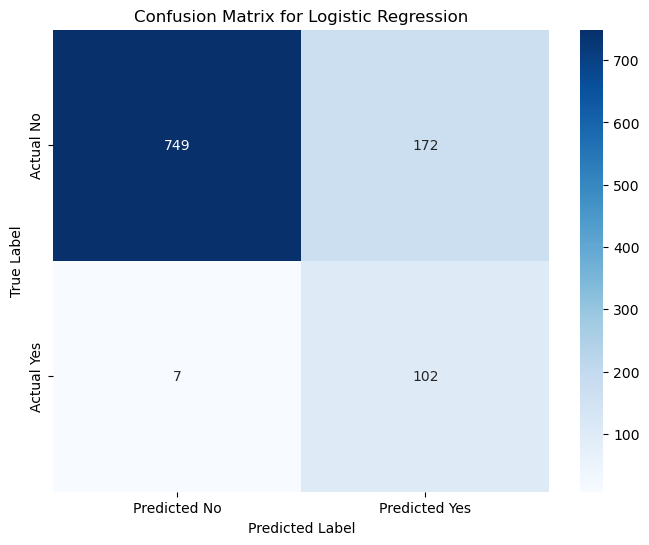

In [161]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


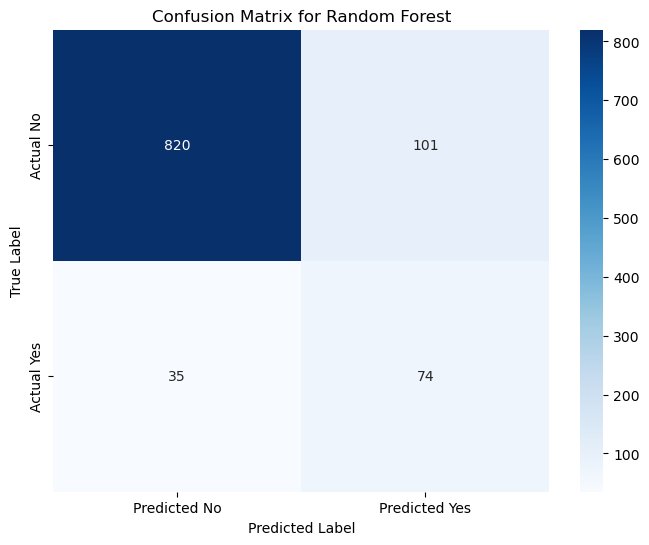

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
